# Анализ рынка компьютерных игр

**Содержание**

1. [Импорт библиотек](#section_2)
2. [Обзор данных](#section_3)
3. [Предобработка данных](#section_4)
    1. [Замена названий столбцов](#section_4_1)
    2. [Обработка пропусков](#section_4_2)
    3. [Изменение типов данных](#section_4_3)
    4. [Проверка дубликатов](#section_4_4)
    5. [Приведение категориальных столбцов к нижнему регистру](#section_4_5)
    6. [Рассчет суммарных продаж](#section_4_6)
4. [Исследовательский анализ данных](#section_5)
    1. [Изучение распределения количества выпущенных игр по годам](#section_5_1)
    2. [Изучение продаж по платформам](#section_5_2)
    3. [Определение актуального периода](#section_5_3)
    4. [Изучение текущей динамики продаж по платформам](#section_5_4)
    5. [Изучение глобальных продаж по платформам](#section_5_5)
    6. [Изучение влияния отзывов на продажи по одной платформе](#section_5_6)
    7. [Изучение влияния отзывов на продажи по остальным платформам](#section_5_7)
    8. [Изучение жанров](#section_5_8)
5. [Портреты пользователей из регионов](#section_6)
    1. [Топ-5 платформ по регионам](#section_6_1)
    2. [Топ-5 жанров по регионам](#section_6_2)
    3. [Влияние рейтинга ESRB на продажи](#section_6_3)
6. [Проверка гипотез](#section_7)
    1. [Рейтинги платформ](#section_7_1)
    2. [Рейтинги жанров](#section_7_2)
7. [Вывод](#section_8)

<a id='section_2'></a>
## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

<a id='section_3'></a>
## Обзор данных

In [2]:
try:
    data = pd.read_csv('games.csv')
except FileNotFoundError:
    data = pd.read_csv('/datasets/games.csv')
except Exception:
    print('Что-то не так с импортом файла')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<a id='section_4'></a>
## Предобработка данных

<a id='section_4_1'></a>
### Замена названий столбцов

Приведем все названия к нижнему регистру

In [5]:
data.columns = list(data.columns.str.lower())
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id='section_4_2'></a>
### Обработка пропусков

В столбцах `name`, `genre` есть пара пропусков, которые мы никак не сможем заполнить. Так как их очень мало, просто удалим строки, где в этих столбцах встречаются пропуски

In [6]:
data[(data['name'].isna()) | (data['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
data = data.dropna(subset=['name', 'genre'])

Столбец `year_of_release` содержит приличное количетво пропусков, чтобы не пропустить часть продаж, заменим на заглушку `-9999`

In [8]:
data['year_of_release'] = data['year_of_release'].fillna(-9999)

Пропуски в `critic_score`, `user_score` сложно заполнить адекватно. Любое наше вмешательство сильно изменит данные, так как в этих столбцах пропусков очень много, но  унас нет никаких дополнительных данных, на основе которых эти пропуски можно было б заполнить.

Заполним пропуски в `rating` значением-заглушкой *"No rating"*

In [9]:
data['rating'] = data['rating'].fillna('No rating')

Разберемся со значением `tbd` в столбце `user_score`. Скорее всего, это значит, что оценок еще слишеом мало, чтобы как-то определить рейтинг. Можно, конечно, посмотреть корреляцию между оценкой юзеров и критоков и попробовать заполнить по ней, но она всего около 0.58, то есть, не очень сильная, поэтому так делать не будем. Просто заменим их на `NaN`, чтобы потом спокойно изменить тип данных столбца.

In [10]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

<a id='section_4_3'></a>
### Изменение типов данных

В нашем случае необходимо привести колонку `year_of_release` к типу данных `int` и `user_score` к типу данных `float`.

In [11]:
data['user_score'] = data['user_score'].astype('float')

Убедимся, что в годах нет ошибок.

In [12]:
data.year_of_release.unique()

array([ 2006.,  1985.,  2008.,  2009.,  1996.,  1989.,  1984.,  2005.,
        1999.,  2007.,  2010.,  2013.,  2004.,  1990.,  1988.,  2002.,
        2001.,  2011.,  1998.,  2015.,  2012.,  2014.,  1992.,  1997.,
        1993.,  1994.,  1982.,  2016.,  2003.,  1986.,  2000., -9999.,
        1995.,  1991.,  1981.,  1987.,  1980.,  1983.])

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')

<a id='section_4_4'></a>
### Приведение категориальных столбцов к нижнему регистру

In [14]:
for col in ['name', 'genre', 'platform', 'rating']:
    data[col] = data[col].str.lower()

<a id='section_4_5'></a>
### Проверка дубликатов

Проверим простые дубликаты.

In [15]:
data.duplicated().sum()

0

Простых дубликатов в датафрейме нет

<a id='section_4_6'></a>
### Рассчет суммарных продаж

Посчитаем суммарные продажи по всем регионам и сохраним в отдельный столбец `total_sales`.

In [16]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Убедимся, что предобработка прошла успешно

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [18]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


<a id='section_5'></a>
## Исследовательский анализ данных

<a id='section_5_1'></a>
### Изучение распределения количества выпущенных игр по годам

Посчитаем, сколько игр выпускалось в каждый год. Для наглядности также построим гистограмму

In [19]:
data.groupby('year_of_release')['name'].count()

year_of_release
-9999     269
 1980       9
 1981      46
 1982      36
 1983      17
 1984      14
 1985      14
 1986      21
 1987      16
 1988      15
 1989      17
 1990      16
 1991      41
 1992      43
 1993      60
 1994     121
 1995     219
 1996     263
 1997     289
 1998     379
 1999     338
 2000     350
 2001     482
 2002     829
 2003     775
 2004     762
 2005     939
 2006    1006
 2007    1197
 2008    1427
 2009    1426
 2010    1255
 2011    1136
 2012     653
 2013     544
 2014     581
 2015     606
 2016     502
Name: name, dtype: int64

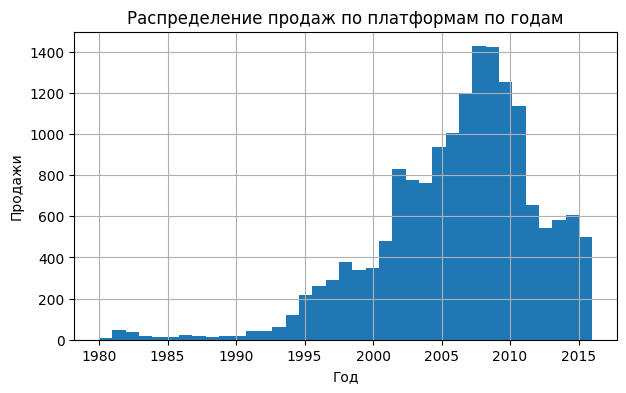

In [20]:
ax = data[data['year_of_release'] > 0].year_of_release.hist(bins=len(data.year_of_release.unique())-1, figsize=(7, 4))

ax.set(
    title='Распределение продаж по платформам по годам',
    xlabel='Год',
    ylabel='Продажи'
);

**Вывод:** видно, что до 1993 года игр выходило очень мало, и лишь потом начался постепенный рос, достигший максимума в 2008 и 2009 годах. Начиная с 2011 года продолжается стабильное уменьшение числа выпускаемых игр.

<a id='section_5_2'></a>
### Изучение продаж по платформам

Выберем лучшие платформы по суммарным продажам

In [21]:
data.pivot_table(values='total_sales', index='platform', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


Кажется, что первые 6 далеко оторвались от остальных. Используем их в дальнейшем анализе

In [22]:
top_platforms = ('ps2', 'x360', 'ps3', 'wii', 'ds', 'ps')

In [23]:
def plot_platform_dynamics(platform, ax):
    (
        data[(data['platform'] == platform) & (data['year_of_release'] > 0)]
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(ax=ax, kind='bar', title=platform, xlabel='Год', ylabel='Продажи', rot=45)
    );

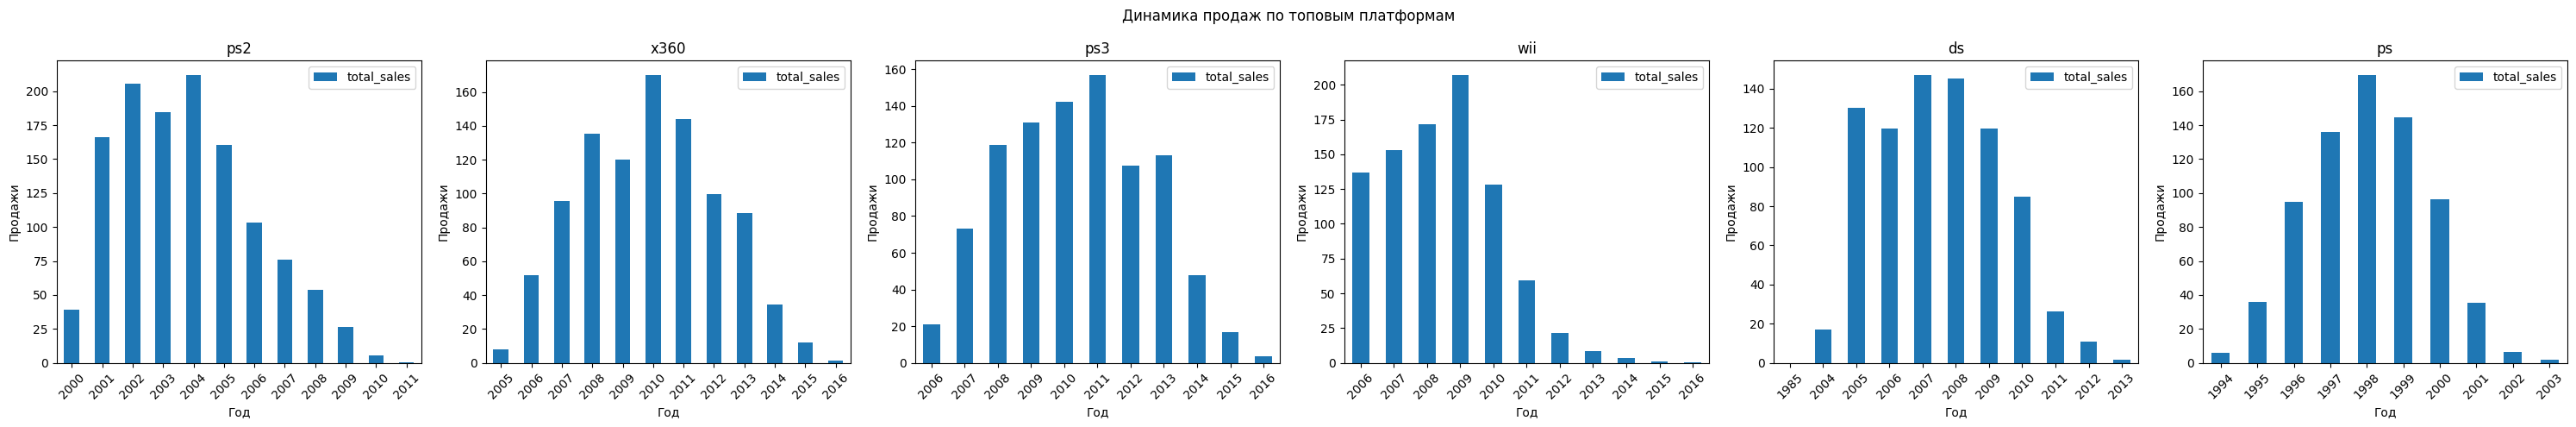

In [24]:
fig, axes = plt.subplots(1, len(top_platforms), figsize=(5*len(top_platforms), 5))
fig.suptitle('Динамика продаж по топовым платформам')

for i in range(len(top_platforms)):
    plot_platform_dynamics(top_platforms[i], axes[i])
    
plt.tight_layout()

**Вывод:** наибольшие продажи у `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`. Среднее "время жизни" платформы 10-12 лет.

Странный выброс 1985 года у DS, стоит удалить аномалию, ведь тогда ее еще не выпустили на рынок.

In [25]:
data = data.drop(data.loc[(data['platform'] == 'ds') & (data['year_of_release'] == 1985)].index)

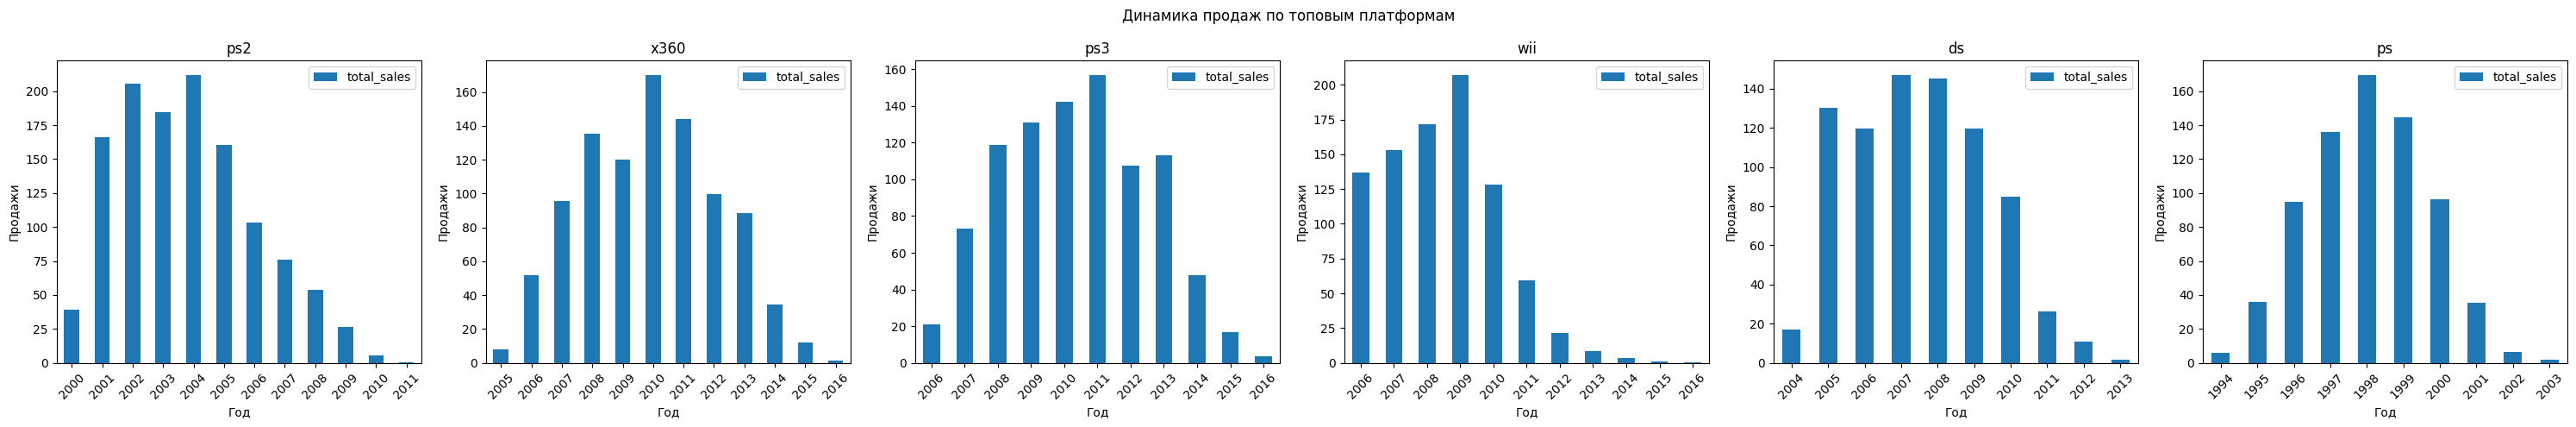

In [26]:
fig, axes = plt.subplots(1, len(top_platforms), figsize=(5*len(top_platforms), 5))
fig.suptitle('Динамика продаж по топовым платформам')

for i in range(len(top_platforms)):
    plot_platform_dynamics(top_platforms[i], axes[i])
    
plt.tight_layout()

<a id='section_5_3'></a>
### Определение актуального периода

Исходя из того, что среднее время жизни платформы не менее 10 лет, и последние 5 лет на рынке идет постепенный спад количества выходящих новых игр, логично взять актуальный период, для которого производить все дальнейшие анализы - *5 лет* (половина времени жизни платформы). Но так как игровая индустрия очень быстро меняется, и новые платформы могут выходить чуть ли не каждые пару лет, возьмем для анализа лишь **последние 3 года с 2014 по 2016**.

In [27]:
data = data[data['year_of_release'] > 2013]

<a id='section_5_4'></a>
### Изучение текущей динамики продаж по платформам

Посмотрим, какие вообще платформы сейчас актуальны (по каким вообще идут продажи)

In [28]:
data.pivot_table(values='total_sales', index='platform', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22
wiiu,42.98
pc,27.05
psv,22.40
wii,5.07


Построим распределения продаж для этих платформ по годам

In [29]:
platforms = data['platform'].unique()

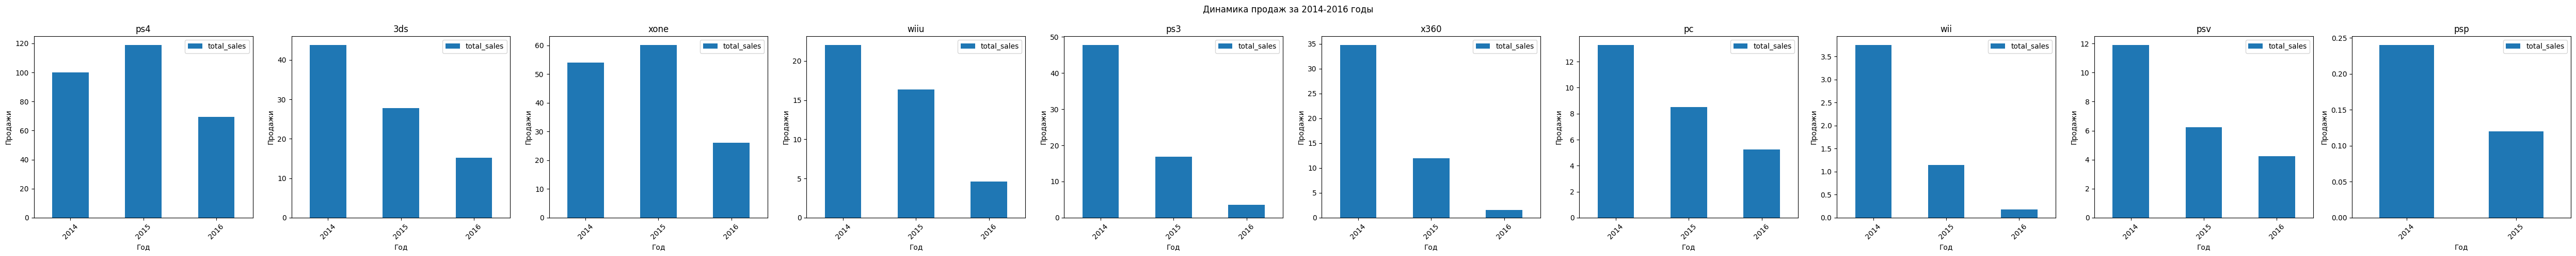

In [30]:
fig, axes = plt.subplots(1, len(platforms), figsize=(5*len(platforms), 5))
fig.suptitle('Динамика продаж за 2014-2016 годы')

for i in range(len(platforms)):
    plot_platform_dynamics(platforms[i], axes[i])
    
plt.tight_layout()

Видно, что такие платформы как `PS3`, `X360`, `3DS`, `Wii`, `PSP`, `DS` уже сильно упали по продажам. С учетом того, что данные за 2016 год не полные, растут `PS4` и `XOne`. `PC` и `WiiU` подают по продажам (опять же, данных на 2016 год целиком нет, но по результатам 2015 по отношению к 2014 продажи на них упали, но `PC` - платформа, у которой жизненный цикл намного больше, чем у остальных, ее стоит оставить в рассмотрении. Объем продаж `3DS` все еще довольно высок, поэтому, с ними еще можно работать.

**Вывод:** потенциально прибыльными можно считать `PS4` и `XOne` - растущие платформы, а также стоит рассматривать `3DS` и `PC` как стабильно приносящие прибыль.

<a id='section_5_5'></a>
### Изучение глобальных продаж по платформам

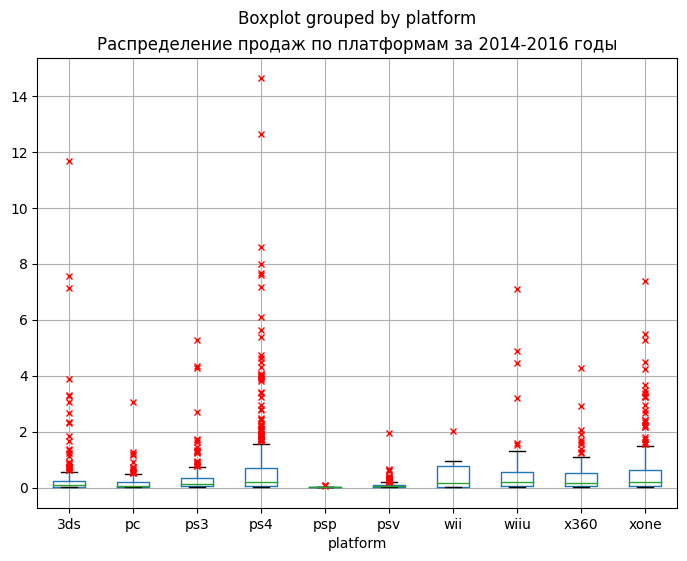

In [31]:
ax = data.boxplot(column='total_sales', by='platform', figsize=(8, 6), flierprops={'markeredgecolor': 'red', 'marker': 'x', 'markersize': 4});
ax.set(
    title='Распределение продаж по платформам за 2014-2016 годы',
);

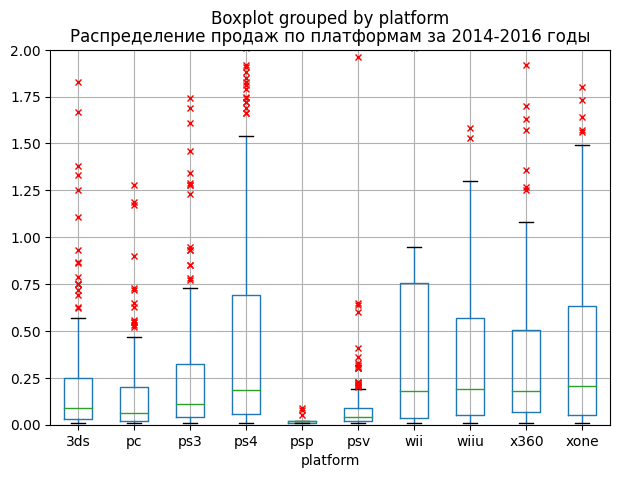

In [32]:
ax = data.boxplot(column='total_sales', by='platform', figsize=(7, 5), flierprops={'markeredgecolor': 'red', 'marker': 'x', 'markersize': 4});
ax.set(
    title='Распределение продаж по платформам за 2014-2016 годы',
    ylim=(0, 2)
);

**Вывод:** в среднем лучшие продажи у `PS4`, `Wii`, `WiiU`, `X360` И `XOne`. Мы знаем, что `Wii` и `X360` уже сильно упали по продажам, но по остальным по медианной цене можно считать привлекательными `WiiU`, `PS4` и `XOne`. По максимальным продажам у `3DS` есть неплохие шансы.

<a id='section_5_6'></a>
### Изучение влияния отзывов на продажи по одной платформе

Выберем топовую платформу - **PS4**. Построим диаграмму рассеяния между продажами и отзывами критиков и зрителей.

In [33]:
data_ps4 = data[data['platform'] == 'ps4']

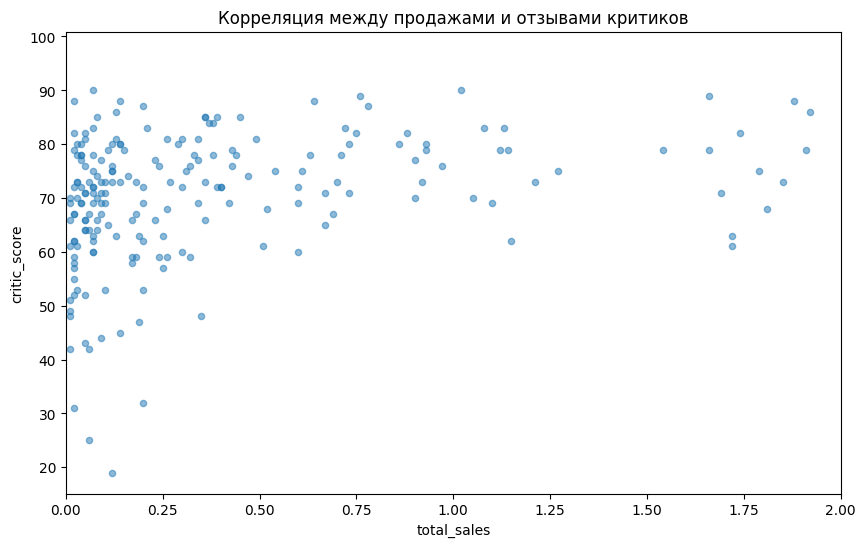

In [34]:
data_ps4.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.5, xlim=(0, 2), figsize=(10, 6))
plt.title('Корреляция между продажами и отзывами критиков');

In [35]:
korr_crit = data_ps4['total_sales'].corr(data_ps4['critic_score'])
print('Коэффициент корреляции:', korr_crit)

Коэффициент корреляции: 0.40266141068104094


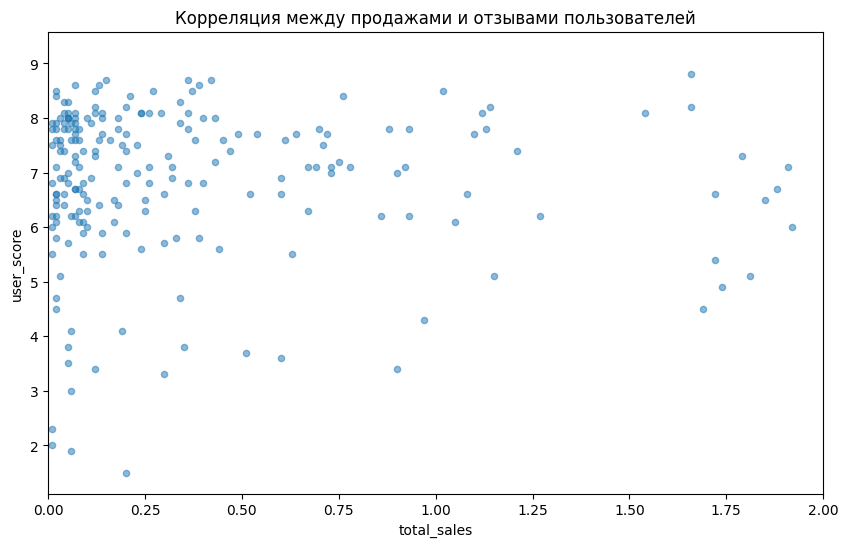

In [36]:
data_ps4.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.5, xlim=(0, 2), figsize=(10, 6))
plt.title('Корреляция между продажами и отзывами пользователей');

In [37]:
print('Коэффициент корреляции:', data_ps4['total_sales'].corr(data_ps4['user_score']))

Коэффициент корреляции: -0.04013158947269733


**Вывод:** между отзывами пользователей и продажами корреляция отсутствует. Между отзывами критиков и продажами корреляция умеренная.

<a id='section_5_7'></a>
### Изучение влияния отзывов на продажи по остальным платформам

Теперь посмотрим, верны ли наши выводы по остальным платформам.

In [38]:
for platform in data['platform'].unique():
    print('\n' + f'Корреляции для {platform}.')
    print('Продажи/отзывы критиков:', \
          data.loc[data['platform'] == platform, 'total_sales'].corr(data.loc[data['platform'] == platform, 'critic_score']))
    print('Продажи/отзывы юзеров:', \
          data.loc[data['platform'] == platform, 'total_sales'].corr(data.loc[data['platform'] == platform, 'user_score']))


Корреляции для ps4.
Продажи/отзывы критиков: 0.40266141068104094
Продажи/отзывы юзеров: -0.04013158947269733

Корреляции для 3ds.
Продажи/отзывы критиков: 0.31411749286905105
Продажи/отзывы юзеров: 0.2151932718527028

Корреляции для xone.
Продажи/отзывы критиков: 0.42867694370333187
Продажи/отзывы юзеров: -0.07038392806475809

Корреляции для wiiu.
Продажи/отзывы критиков: 0.370201412480884
Продажи/отзывы юзеров: 0.4079264579217078

Корреляции для ps3.
Продажи/отзывы критиков: 0.44657460493190704
Продажи/отзывы юзеров: -0.16676141347662116

Корреляции для x360.
Продажи/отзывы критиков: 0.5257228356581523
Продажи/отзывы юзеров: -0.138444570945665

Корреляции для pc.
Продажи/отзывы критиков: 0.17463413769350036
Продажи/отзывы юзеров: -0.07159665703472452

Корреляции для wii.
Продажи/отзывы критиков: nan
Продажи/отзывы юзеров: 1.0

Корреляции для psv.
Продажи/отзывы критиков: 0.04266490657009526
Продажи/отзывы юзеров: -0.16845504978064446

Корреляции для psp.
Продажи/отзывы критиков: nan


**Вывод:** видно, что, в целом, картина сохраняется.

<a id='section_5_8'></a>
### Изучение жанров

Посмотрим на распределение игр по жанрам, выявим самые прибыльные и убыточные.

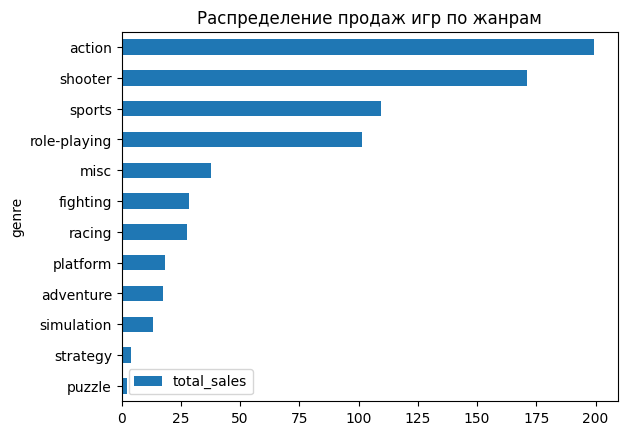

In [39]:
(
    data
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
    .plot(kind='barh', title='Распределение продаж игр по жанрам')
);

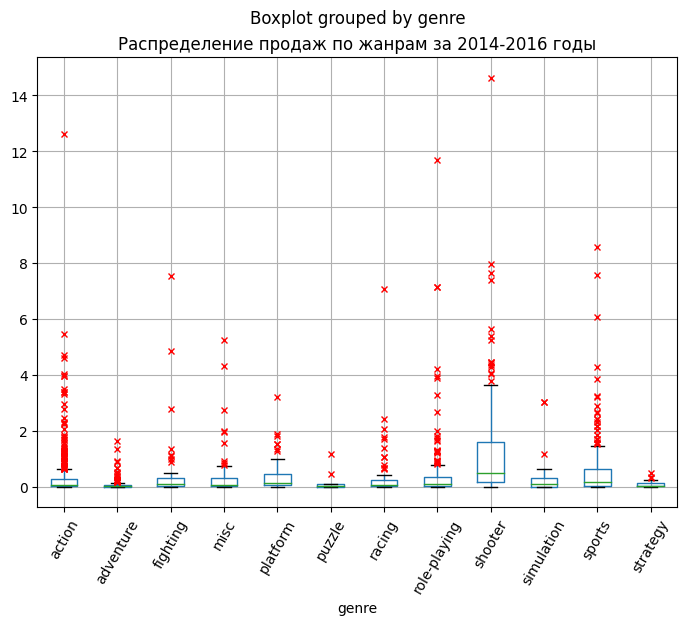

In [40]:
ax = data.boxplot(
    column='total_sales',
    by='genre',
    figsize=(8, 6),
    flierprops={'markeredgecolor': 'red', 'marker': 'x', 'markersize': 4},
    rot=60
);
ax.set(
    title='Распределение продаж по жанрам за 2014-2016 годы',
);

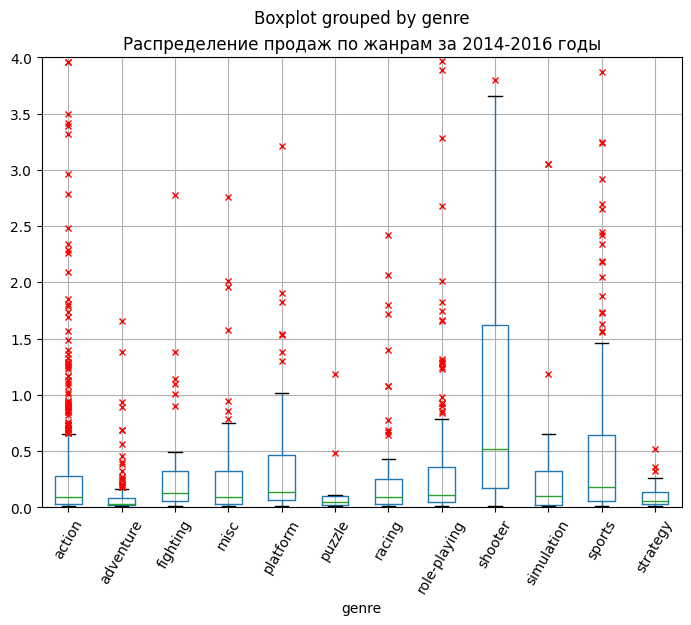

In [41]:
ax = data.boxplot(
    column='total_sales',
    by='genre',
    figsize=(8, 6),
    flierprops={'markeredgecolor': 'red', 'marker': 'x', 'markersize': 4},
    rot=60
);
ax.set(
    title='Распределение продаж по жанрам за 2014-2016 годы',
    ylim=(0, 4)
);

**Вывод:** наиболее прибыльные жанры по медианой цене - `shooter` и `sports`, по 75-квантили еще неплохо выделяется жанр `platform`. По количеству дорогих игр (выбросов), видно, что `rpg` и `action` также перспективны. Наименее прибыльные `puzzle`, `adventure` и `strategy`.

<a id='section_6'></a>
## Портреты пользователей из регионов

Для каждого региона NA, EU, JP определим портреты пользователя: выделим топ-5 платформ, топ-5 жанров, изучим влияние возрастного рейтинга.

In [42]:
regions = ('na', 'eu', 'jp')

<a id='section_6_1'></a>
### Топ-5 платформ по регионам

In [43]:
for i in range(len(regions)):
    top5_platform = list(data
                         .pivot_table(index='platform', values=f'{regions[i].lower()}_sales', aggfunc='sum')
                         .sort_values(by=f'{regions[i].lower()}_sales', ascending=False)[:5]
                         .index
                        )
    print(f'Топ-5 {regions[i]} platform:', top5_platform)

Топ-5 na platform: ['ps4', 'xone', 'x360', '3ds', 'ps3']
Топ-5 eu platform: ['ps4', 'xone', 'ps3', 'pc', '3ds']
Топ-5 jp platform: ['3ds', 'ps4', 'psv', 'ps3', 'wiiu']


In [44]:
def find_under_top5_na_platforms(row):
    if row['platform'] not in ['ps4', 'xone', 'x360', '3ds', 'ps3']:
        return 'other'
    else:
        return row['platform']

def find_under_top5_eu_platforms(row):
    if row['platform'] not in ['ps4', 'xone', 'ps3', 'pc', '3ds']:
        return 'other'
    else:
        return row['platform']

def find_under_top5_jp_platforms(row):
    if row['platform'] not in ['3ds', 'ps4', 'psv', 'ps3', 'wiiu']:
        return 'other'
    else:
        return row['platform']

In [45]:
data['cat_na_platform'] = data.apply(find_under_top5_na_platforms, axis=1)
data['cat_eu_platform'] = data.apply(find_under_top5_eu_platforms, axis=1)
data['cat_jp_platform'] = data.apply(find_under_top5_jp_platforms, axis=1)

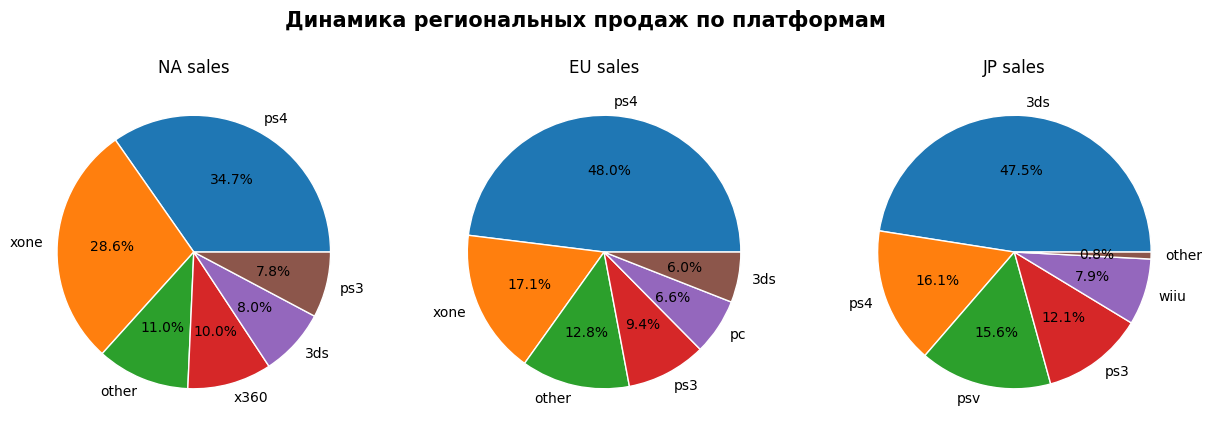

In [46]:
fig, ax = plt.subplots(1, len(regions), figsize=(5*len(regions), 5))
fig.suptitle('Динамика региональных продаж по платформам', fontsize = 15, fontweight='bold')

for i in range(len(regions)):
    x = (
            data
            .pivot_table(index=f'cat_{regions[i]}_platform', values=f'{regions[i]}_sales', aggfunc='sum')
            .sort_values(by=f'{regions[i]}_sales', ascending=False)
        )
    x.plot(
            ax=ax[i],
            x=f'cat_{regions[i]}_platform',
            y=f'{regions[i]}_sales',
            kind='pie',
            title=f'{regions[i].upper()} sales',
            legend=False,
            ylabel='',
            autopct='%.1f%%',
            wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}
            )

**Вывод:** европейский и североамериканский регионы похожи по составу топа, однако, платформы входят туда с разными долями. В Европе `PS4` преобладает со значительным перевесом, а в Северной Америке доля `PS4` и `XOne` примерно равная. Японский регион сильно отличается: там вообще нет платформ `XOne` и `X360`, а `PS4` занимает всего лишь 16,1% рынка. Подавляющее преимущество тут у `3DS`.

<a id='section_6_2'></a>
### Топ-5 жанров по регионам

In [47]:
for i in range(len(regions)):
    top5_genres = list(data
                         .pivot_table(index='genre', values=f'{regions[i].lower()}_sales', aggfunc='sum')
                         .sort_values(by=f'{regions[i].lower()}_sales', ascending=False)[:5]
                         .index
                        )
    print(f'Топ-5 {regions[i]} genres:', top5_genres)

Топ-5 na genres: ['shooter', 'action', 'sports', 'role-playing', 'misc']
Топ-5 eu genres: ['action', 'shooter', 'sports', 'role-playing', 'racing']
Топ-5 jp genres: ['role-playing', 'action', 'fighting', 'misc', 'shooter']


In [48]:
def find_under_top5_na_genres(row):
    if row['genre'] not in ['shooter', 'action', 'sports', 'role-playing', 'misc']:
        return 'other'
    else:
        return row['genre']

def find_under_top5_eu_genres(row):
    if row['genre'] not in ['action', 'shooter', 'sports', 'role-playing', 'racing']:
        return 'other'
    else:
        return row['genre']

def find_under_top5_jp_genres(row):
    if row['genre'] not in ['role-playing', 'action', 'fighting', 'misc', 'shooter']:
        return 'other'
    else:
        return row['genre']

In [49]:
data['cat_na_genre'] = data.apply(find_under_top5_na_genres, axis=1)
data['cat_eu_genre'] = data.apply(find_under_top5_eu_genres, axis=1)
data['cat_jp_genre'] = data.apply(find_under_top5_jp_genres, axis=1)

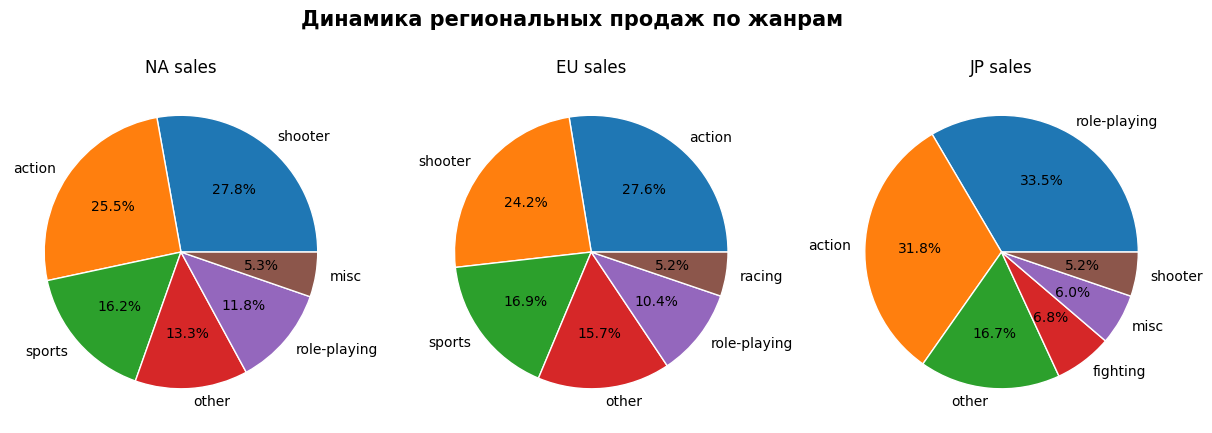

In [50]:
fig, ax = plt.subplots(1, len(regions), figsize=(5*len(regions), 5))
fig.suptitle('Динамика региональных продаж по жанрам', fontsize = 15, fontweight='bold')

for i in range(len(regions)):
    x = (
            data
            .pivot_table(index=f'cat_{regions[i]}_genre', values=f'{regions[i]}_sales', aggfunc='sum')
            .sort_values(by=f'{regions[i]}_sales', ascending=False)
        )
    x.plot(
            ax=ax[i],
            x=f'cat_{regions[i]}_genre',
            y=f'{regions[i]}_sales',
            kind='pie', title=f'{regions[i].upper()} sales',
            legend=False, ylabel='',
            autopct='%.1f%%',
            wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}
            )

**Вывод:**  В данном случае европейский и североамериканский рынки очень похожи. Небольшое отличие в процентном соотношении незначительно, лишь 5-м жанром в СА стала музыка, а в Европе - гонки. Японский рынок снова сильно отличается: в топ входит жанр файтингов, PRG на первом месте, а PRG и Action суммарно занимают примерно 7/10 рынка.

<a id='section_6_3'></a>
### Влияние рейтинга ESRB на продажи

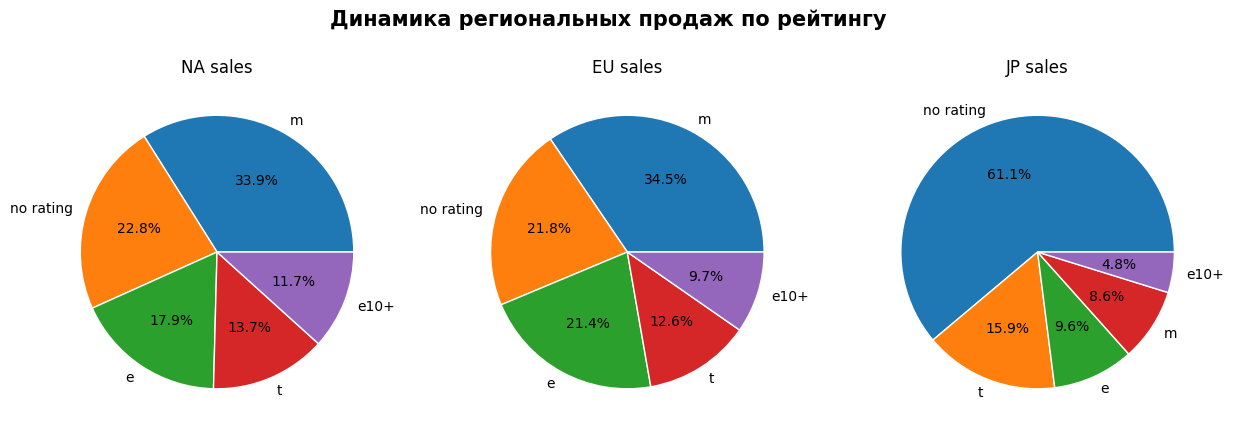

In [51]:
fig, ax = plt.subplots(1, len(regions), figsize=(5*len(regions), 5))
fig.suptitle('Динамика региональных продаж по рейтингу', fontsize = 15, fontweight='bold')

for i in range(len(regions)):
    x = (
            data
            .pivot_table(index='rating', values=f'{regions[i]}_sales', aggfunc='sum')
            .sort_values(by=f'{regions[i]}_sales', ascending=False)
        )
    x.plot(
            ax=ax[i],
            x='rating',
            y=f'{regions[i]}_sales',
            kind='pie', title=f'{regions[i].upper()} sales',
            legend=False, ylabel='',
            autopct='%.1f%%',
            wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}
            )

**Вывод:** так как ESRB - американский рейтинг, очевидно, что на японском рынке множество игр его не имеют (более 60%). На европейском и североамериканском рынках, в основном, продаются игры для взрослых (17+). Игр без рейтинга примерно поровну, в Европе чуть больше детских игр. На японском рынке вреди игр с рейтингом в топе игры для подростков.

<a id='section_7'></a>
## Проверка гипотез

Проверим следующие гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action и Sports разные.

<a id='section_7_1'></a>
### Рейтинги платформ

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Зададим alpha = 0.05, стандартно используемый в проверке гипотез.

H0: средние пользовательские рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.

H1: средние пользовательские рейтинг платформы Xbox One **НЕ** равен среднему пользовательскому рейтингу платформы PC.

Проверяем гипотезу о равенстве средних двух генеральных совокупностей

In [52]:
sample_1 = list(data.loc[(data['platform'] == 'xone') & (data['user_score'].notna()), 'user_score'])
sample_2 = list(data.loc[(data['platform'] == 'pc') & (data['user_score'].notna()), 'user_score'])

results = st.ttest_ind(sample_1, sample_2)

print('p-значение: ', results.pvalue)

p-значение:  0.10450507919348415


**p-value** больше заданного уровня значимости (5%), значит нулевую гипотезу не отвергаем. В таком случае, нашей гипотезе о равенстве средних рейтингов платформ данные не противоречат, принимаем ее.

<a id='section_7_2'></a>
### Рейтинги жанров 

Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.

Зададим alpha = 0.05, стандартно используемый в проверке гипотез.

H0: средние пользовательские рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

H1: средние пользовательские рейтинг жанра Action **НЕ** равен среднему пользовательскому рейтингу жанра Sports.

Проверяем гипотезу о равенстве средних двух генеральных совокупностей. В случае неравенства, наша гипотеза о разности рейтингов окажется правильной.

In [53]:
sample_1 = list(data.loc[(data['genre'] == 'action') & (data['user_score'].notna()), 'user_score'])
sample_2 = list(data.loc[(data['genre'] == 'sports') & (data['user_score'].notna()), 'user_score'])

results = st.ttest_ind(sample_1, sample_2)

print('p-значение: ', results.pvalue)

p-значение:  2.8711147985105864e-19


**p-value** меньше уровня значимости, значит нулевую гипотезу следует отвергнуть. В таком случае, мы принимаем альтернативную гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

<a id='section_8'></a>
## Вывод

На данный момент на североамериканском и европейском рынках перспективными являются платформы `PS4` и `XboxOne`. На японском рынке стоит обратить внимание на `PS4` и `3DS`. Эти платформы развиваются либо находятся близко к пику своего развития.

Топ-3 жанра в североамериканском и европейском регионах, на которые стоит обратить внимание: **Action**, **Shooter** и **Sports**. В Японском регионе 2 жанра занимают 7/10 рынка: **RPG**, **Action**.

Рейтинг ESRB слабо влияет на продажи в японском регионе: там покупают игры для подростков и всех. А вот в Северной Америке и Европе лучше продаются игры с рейтингом *'M'*, *'E'*, *'E10+'*.

Оценки критиков и зрителей практически не влияют на продажи.